<a href="https://colab.research.google.com/github/dipt4aaaa/HumanPose/blob/main/RandomForestHumanPoseRevisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os # use to navigate through structures
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')
len(gpus)

1

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

# Getting Data

In [ ]:
import cv2
import imghdr

C:\Users\SER\AppData\Local\Temp\ipykernel_8888\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = 'dataset_revisi'

In [ ]:
os.listdir(os.path.join(data_dir, 'Bicycling'))

['000769780.jpg',
 '001218755.jpg',
 '001594569.jpg',
 '001712209.jpg',
 '002898693.jpg',
 '003133746.jpg',
 '003436303.jpg',
 '003723120.jpg',
 '003794973.jpg',
 '004069980.jpg',
 '005856531.jpg',
 '006222417.jpg',
 '006878066.jpg',
 '007914862.jpg',
 '007928028.jpg',
 '009137144.jpg',
 '010671497.jpg',
 '013118510.jpg',
 '015705888.jpg',
 '016266082.jpg',
 '019965969.jpg',
 '020644269.jpg',
 '020883094.jpg',
 '021372115.jpg',
 '022730241.jpg',
 '023009079.jpg',
 '025396640.jpg',
 '025422503.jpg',
 '026855411.jpg',
 '028462991.jpg',
 '028554294.jpg',
 '029708865.jpg',
 '031209192.jpg',
 '032772696.jpg',
 '033149227.jpg',
 '033207524.jpg',
 '034548085.jpg',
 '035583038.jpg',
 '036205585.jpg',
 '036300145.jpg',
 '037596110.jpg',
 '037875145.jpg',
 '042730604.jpg',
 '043140570.jpg',
 '043261493.jpg',
 '044605723.jpg',
 '044908796.jpg',
 '045062341.jpg',
 '048820998.jpg',
 '050409511.jpg',
 '052100217.jpg',
 '052187297.jpg',
 '052282753.jpg',
 '052744105.jpg',
 '053941819.jpg',
 '05402788

In [ ]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']
img_exts[1]

'jpg'

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

000769780.jpg
001218755.jpg
001594569.jpg
001712209.jpg
002898693.jpg
003133746.jpg
003436303.jpg
003723120.jpg
003794973.jpg
004069980.jpg
005856531.jpg
006222417.jpg
006878066.jpg
007914862.jpg
007928028.jpg
009137144.jpg
010671497.jpg
013118510.jpg
015705888.jpg
016266082.jpg
019965969.jpg
020644269.jpg
020883094.jpg
021372115.jpg
022730241.jpg
023009079.jpg
025396640.jpg
025422503.jpg
026855411.jpg
028462991.jpg
028554294.jpg
029708865.jpg
031209192.jpg
032772696.jpg
033149227.jpg
033207524.jpg
034548085.jpg
035583038.jpg
036205585.jpg
036300145.jpg
037596110.jpg
037875145.jpg
042730604.jpg
043140570.jpg
043261493.jpg
044605723.jpg
044908796.jpg
045062341.jpg
048820998.jpg
050409511.jpg
052100217.jpg
052187297.jpg
052282753.jpg
052744105.jpg
053941819.jpg
054027889.jpg
054999749.jpg
055236614.jpg
056019255.jpg
057337679.jpg
057698161.jpg
058491150.jpg
058735463.jpg
059099996.jpg
059140741.jpg
059247465.jpg
059522973.jpg
061135303.jpg
062130209.jpg
063333858.jpg
063343203.jpg
066182

In [ ]:
img = cv2.imread(os.path.join('dataset_revisi', 'Walking', 'Copy of 000607062.jpg'))

In [ ]:
img

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

In [ ]:
img.shape #480 pixels high, 640 pixels wide

(480, 640, 3)

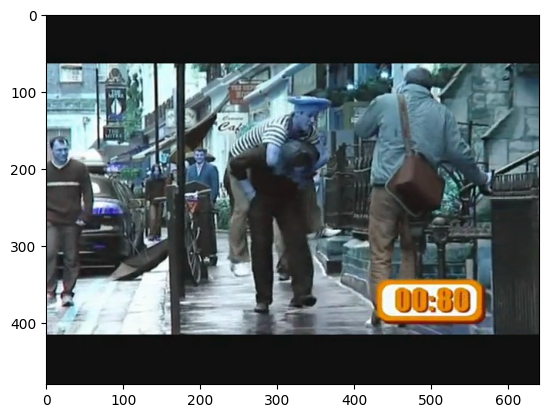

In [ ]:
plt.imshow(img)

In [ ]:
# removing dodgy image
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

# Load Dataset

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('dataset_revisi') # dataset configuration (reshape image, dll)

Found 534 files belonging to 5 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator() # convert data (generator) into a numpy iterator (array not dataset)

In [ ]:
# get another batch from the iterator
batch = data_iterator.next()

In [ ]:
batch

(array([[[[ 56.     ,  62.     ,  28.     ],
          [ 72.     ,  78.     ,  44.     ],
          [ 59.09375,  65.09375,  27.09375],
          ...,
          [ 57.     ,  57.     ,  23.     ],
          [ 71.71875,  71.71875,  35.71875],
          [ 74.90625,  74.90625,  40.90625]],
 
         [[ 62.3125 ,  68.3125 ,  32.875  ],
          [ 67.     ,  73.     ,  39.     ],
          [ 53.875  ,  59.875  ,  21.875  ],
          ...,
          [ 65.4375 ,  62.4375 ,  29.4375 ],
          [ 90.03125,  87.03125,  54.03125],
          [101.78125,  98.78125,  65.78125]],
 
         [[ 67.53125,  73.53125,  37.53125],
          [ 68.     ,  74.     ,  38.     ],
          [ 62.125  ,  69.125  ,  28.125  ],
          ...,
          [ 65.59375,  65.59375,  30.53125],
          [ 94.1875 ,  94.1875 ,  58.1875 ],
          [ 97.5625 ,  97.5625 ,  63.5625 ]],
 
         ...,
 
         [[181.28125, 177.28125, 132.28125],
          [124.5    , 120.5    ,  75.5    ],
          [ 94.     ,  85.    

In [ ]:
len(batch)

2

In [ ]:
batch[0]

array([[[[ 56.     ,  62.     ,  28.     ],
         [ 72.     ,  78.     ,  44.     ],
         [ 59.09375,  65.09375,  27.09375],
         ...,
         [ 57.     ,  57.     ,  23.     ],
         [ 71.71875,  71.71875,  35.71875],
         [ 74.90625,  74.90625,  40.90625]],

        [[ 62.3125 ,  68.3125 ,  32.875  ],
         [ 67.     ,  73.     ,  39.     ],
         [ 53.875  ,  59.875  ,  21.875  ],
         ...,
         [ 65.4375 ,  62.4375 ,  29.4375 ],
         [ 90.03125,  87.03125,  54.03125],
         [101.78125,  98.78125,  65.78125]],

        [[ 67.53125,  73.53125,  37.53125],
         [ 68.     ,  74.     ,  38.     ],
         [ 62.125  ,  69.125  ,  28.125  ],
         ...,
         [ 65.59375,  65.59375,  30.53125],
         [ 94.1875 ,  94.1875 ,  58.1875 ],
         [ 97.5625 ,  97.5625 ,  63.5625 ]],

        ...,

        [[181.28125, 177.28125, 132.28125],
         [124.5    , 120.5    ,  75.5    ],
         [ 94.     ,  85.     ,  42.     ],
         ...,


In [ ]:
batch[1] #labels represented by numpy arrays, but not sure which label belong to which number

array([2, 2, 2, 0, 2, 4, 4, 0, 2, 2, 2, 4, 2, 3, 3, 0, 1, 2, 3, 4, 2, 1,
       1, 3, 0, 1, 2, 0, 3, 1, 2, 2])

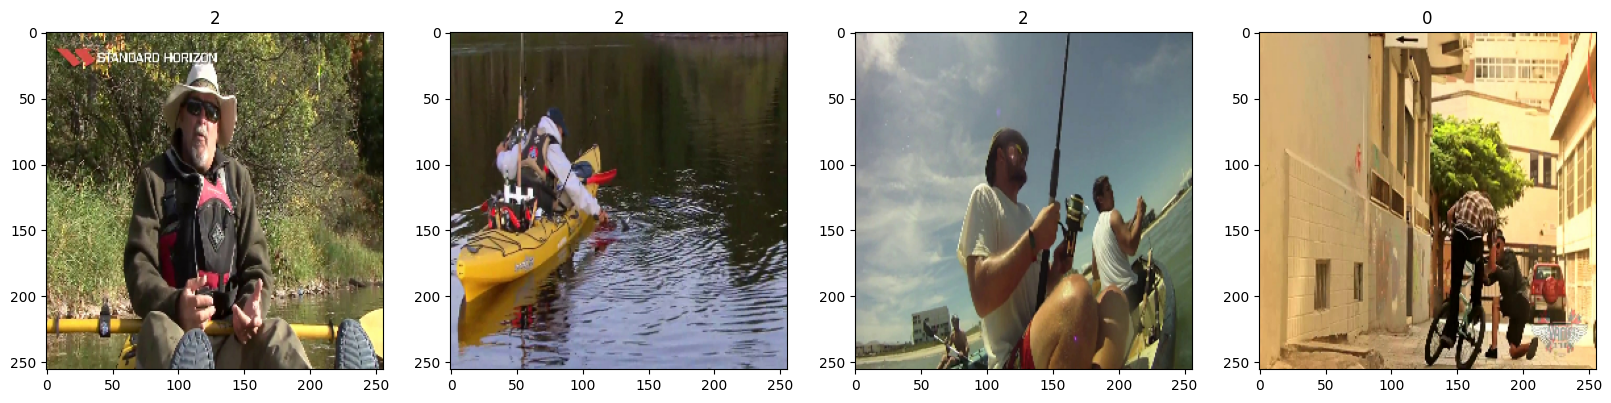

In [ ]:
fig, ax = plt. subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Note: class 0 is Bicycling, class 1 is Eating, class 2 is Fishing, class 3 is Fitball Exercise, and class 4 is Walking

# Preprocess Data

Scaling Image Values Between 0-1

In [ ]:
# scaling image values between 0 to 1
import tensorflow as tf
data = data.map(lambda x, y: (x / 255, y))
# data = data.map(lambda x, y: (tf.reshape(x / 255, (-1, 256*256*3)), y))

# num_classes = 5
# data = data.map(lambda x, y: (x, tf.one_hot(tf.cast(y, tf.int32), num_classes)))

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
# ])

# augmented_data = data.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

In [ ]:
batch[1]

array([4, 2, 2, 0, 1, 0, 1, 2, 4, 4, 2, 3, 0, 3, 1, 3, 3, 0, 4, 4, 2, 1,
       0, 0, 4, 1, 4, 2, 3, 0, 1, 4], dtype=int32)

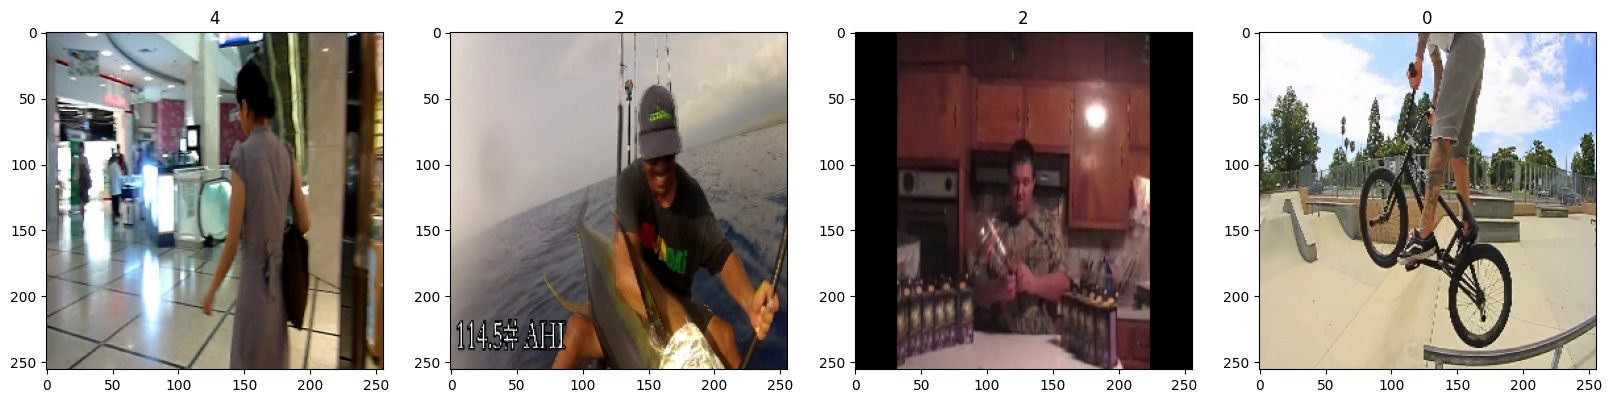

In [ ]:
fig, ax = plt. subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Hyperparameter Tuning, Training, Testing, dan Eavluasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assume 'X' adalah matriks fitur dan 'y' adalah vektor target
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    batch[0], batch[1], test_size=0.2, random_state=42, stratify=batch[1]
)

# Flatten X
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Split data menjadi k-fold menggunakan KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan model Random Forest
rf_model = RandomForestClassifier()

# Definisikan daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=kfold, n_jobs=-1)

# Latih model menggunakan data
grid_search.fit(X_train_flat, y_train)

# Cetak parameter terbaik dan skor akurasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Prediksi menggunakan model terbaik
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_flat)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(y_test, y_pred, zero_division=1))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.6
Test Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2

    accuracy                           0.43         7
   macro avg       0.53      0.30      0.29         7
weighted avg       0.62      0.43      0.42         7

